## AI211: Machine Exercise 1

Jhon Mark L. Acopiado  
MEngg AI  
University of the Philippines Diliman

### Problem 1: Energy Efficiency in Buildings 

Go to https://archive.ics.uci.edu/ml/datasets/Energy+efficiency. 


Download the Energy efficiency dataset. The dataset contains 768 samples of simulated buildings with 8 
attributes (X1 to X8) and two targets (Y1 and Y2). The following are their meanings: 

The predictive model for heating and cooling loads of these buildings are useful for analyzing their energy 
consumption, in particular, in cold countries. In this problem, let’s predict the heating load only:

In [34]:
# Loading the Energy Efficiency dataset from UCI Machine Learning Repository
# Souce Code: https://archive.ics.uci.edu/dataset/242/energy+efficiency
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score
import numpy as np
from sklearn.pipeline import Pipeline

# Use only the heating load (Y1) as target
y_heating = y["Y1"]

# Split into train (60%), temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_heating, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 10 different regularization strengths
alphas = np.logspace(-3, 3, 10)

best_alpha = None
best_val_score = -np.inf
best_model = None

for alpha in alphas:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    pipe.fit(X_train, y_train)
    val_pred = pipe.predict(X_val)
    val_score = r2_score(y_val, val_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        best_alpha = alpha
        best_model = pipe

# Final evaluation
train_score =  r2_score(y_train, best_model.predict(X_train))
val_score = r2_score(y_val, best_model.predict(X_val))
test_score = r2_score(y_test, best_model.predict(X_test))

ridge = best_model.named_steps['ridge']

print("Best alpha:", best_alpha)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("Training R^2:", train_score)
print("Validation R^2:", val_score)
print("Test R^2:", test_score)

Best alpha: 0.001
Coefficients: [-6.30601655 -3.44596195  0.83813248 -3.74055687  7.27928784 -0.02000679
  2.70137286  0.37646817]
Intercept: 22.079978260869552
Training R^2: 0.9181856628037611
Validation R^2: 0.9050265244755586
Test R^2: 0.9195868326893604


What is the best model’s coefficients, intercept, and its training, validation, and test accuracy?

- **Best alpha:** <mark style="background-color: #80d1fcff; color: black;">0.001</mark>
- **Coefficients:** <mark style="background-color: #80d1fcff; color: black;">[-6.30601655, -3.44596195, 0.83813248, -3.74055687, 7.27928784, -0.02000679, 2.70137286, 0.37646817]</mark>
- **Intercept:** <mark style="background-color: #80d1fcff; color: black;">22.079978260869552</mark>
- **Training R²:** <mark style="background-color: #80d1fcff; color: black;">0.9182</mark>
- **Validation R²:** <mark style="background-color: #80d1fcff; color: black;">0.9050</mark>
- **Test R²:** <mark style="background-color: #80d1fcff; color: black;">0.9196</mark>


B.  
(a) What are the top 5 features among X1 to X8?  
- **Answer:**  
    The top 5 features (by absolute value of Ridge regression coefficients) among X1 to X8 are:

    1. <mark style="background-color: #80d1fcff; color: black;">**X5** (Overall Height)</mark>
    2. <mark style="background-color: #80d1fcff; color: black;">**X1** (Relative Compactness)</mark>
    3. <mark style="background-color: #80d1fcff; color: black;">**X4** (Roof Area)</mark>
    4. <mark style="background-color: #80d1fcff; color: black;">**X2** (Surface Area)</mark>
    5. <mark style="background-color: #80d1fcff; color: black;">**X7** (Glazing Area)</mark>

    These features were identified as having the largest impact on predicting the heating load (Y1).

(b) If you repeat the procedure above using only the 5 top features, what are the results?  
- **Answer:**  

    <mark style="background-color: #80d1fcff; color: black;">Answer is implemented in the following code:</mark>

In [38]:
# Get the feature names for X1 to X8
feature_names = np.array(X.columns[:8])

# Get absolute value of coefficients for the best Ridge model
coef_abs = np.abs(ridge.coef_[:8])

# Get indices of top 5 features
top5_idx = np.argsort(coef_abs)[-5:][::-1]
top5_features = feature_names[top5_idx]

print("Top 5 features among X1 to X8:", list(top5_features))

# Select only the top 5 features
X_top5 = X[top5_features]

# Use only the heating load (Y1) as target
y_heating = y["Y1"]

# Repeat the train/val/test split
X_train5, X_temp5, y_train5, y_temp5 = train_test_split(X_top5, y_heating, test_size=0.4, random_state=42)
X_val5, X_test5, y_val5, y_test5 = train_test_split(X_temp5, y_temp5, test_size=0.5, random_state=42)

best_alpha5 = None
best_val_score5 = -np.inf
best_model5 = None

for alpha in alphas:
    pipe5 = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    pipe5.fit(X_train5, y_train5)
    val_pred5 = pipe5.predict(X_val5)
    val_score5 = r2_score(y_val5, val_pred5)
    if val_score5 > best_val_score5:
        best_val_score5 = val_score5
        best_alpha5 = alpha
        best_model5 = pipe5

train_score5 = r2_score(y_train5, best_model5.predict(X_train5))
val_score5 = r2_score(y_val5, best_model5.predict(X_val5))
test_score5 = r2_score(y_test5, best_model5.predict(X_test5))

ridge5 = best_model5.named_steps['ridge']

print("Best alpha (top 5 features):", best_alpha5)
print("Coefficients (top 5 features):", ridge5.coef_)
print("Intercept (top 5 features):", ridge5.intercept_)
print("Training R^2 (top 5 features):", train_score5)
print("Validation R^2 (top 5 features):", val_score5)
print("Test R^2 (top 5 features):", test_score5)

Top 5 features among X1 to X8: ['X5', 'X1', 'X4', 'X2', 'X7']
Best alpha (top 5 features): 0.001
Coefficients (top 5 features): [ 7.27584812 -6.29554368 -5.46515224 -1.76668842  2.77160332]
Intercept (top 5 features): 22.07997826086955
Training R^2 (top 5 features): 0.9168283653189249
Validation R^2 (top 5 features): 0.9048512960943583
Test R^2 (top 5 features): 0.9194771481587971


### Model performance using only the top 5 features

**Top 5 features among X1 to X8:**  <mark style="background-color: #80d1fcff; color: black;">['X5', 'X1', 'X4', 'X2', 'X7']</mark>

**Best alpha (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">0.001</mark>

**Coefficients (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">[ 7.28, -6.30, -5.47, -1.77, 2.77 ]</mark>

**Intercept (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">22.08</mark>

**Training R² (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">0.9168</mark>

**Validation R² (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">0.9049</mark>

**Test R² (top 5 features):**  <mark style="background-color: #80d1fcff; color: black;">0.9195</mark>


Using only the top 5 features in the model results in minimal loss of accuracy compared to using all features. This indicates that the model's predictive performance remains nearly the same, while the number of input variables is significantly reduced. Reducing the feature set simplifies the model, making it more efficient and easier to interpret without sacrificing much accuracy.


### Insights from the Ridge Regression Results

- **Model Performance:**  
    The Ridge regression model achieved high R² scores on both the training and test sets, indicating strong predictive performance for heating load using the available features.

- **Feature Importance:**  
    The most influential features for predicting heating load (`Y1`) were identified as `X5` (Overall Height), `X1` (Relative Compactness), `X4` (Roof Area), `X2` (Surface Area), and `X7` (Glazing Area). Using only these top 5 features resulted in only a slight decrease in model performance, suggesting that much of the predictive power is concentrated in these variables.

- **Regularization Effect:**  
    The best results were obtained with a very low regularization strength (`alpha ≈ 0.001`), indicating that the model benefits from minimal penalty on the coefficients, possibly due to the relatively low multicollinearity or noise in the dataset.

- **Dimensionality Reduction:**  
    Reducing the feature set to the top 5 features did not significantly harm the model's accuracy. This suggests that a simpler model with fewer variables can be used without substantial loss in predictive ability, which is beneficial for interpretability and computational efficiency.

- **Generalization:**  
    The close values of training and test R² scores indicate that the model generalizes well and is not overfitting to the training data.

- **Equation Form:**  
    $y = 7.28\,X_5 - 6.30\,X_1 - 5.47\,X_4 - 1.77\,X_2 + 2.77\,X_7 + 22.08$

    **Interpretation:**  
    - **Positive coefficients:** Overall height ($X_5$) and glazing area ($X_7$) increase the predicted heating load.
    - **Negative coefficients:** Relative compactness ($X_1$), roof area ($X_4$), and surface area ($X_2$) decrease the predicted heating load.
    - While intuition might suggest that a larger surface area ($X_2$) would increase heating load, the model’s coefficients are determined by the patterns in the data, not by physical reasoning. This highlights the importance of data-driven modeling and the need to interpret results in the context of the dataset.


Overall, the analysis demonstrates that heating load in buildings can be accurately predicted using a small subset of key features, and that Ridge regression is effective for this regression task.




### Problem 2: Classifying Breast Tumors 

Go to https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  

Download the Wisconsin Breast Cancer dataset. The dataset contains 569 instances of breast tumors 
with 30 attributes. The goal is make a classifer for the tumor status.

In [40]:
# Source Code from UCI ML Repo: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Split the samples into 70% Training and 30% Testing, stratified by y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build pipeline: StandardScaler + LogisticRegression (default penalty)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train, y_train.values.ravel())

train_acc = pipe.score(X_train, y_train)
test_acc = pipe.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

# Feature importance (absolute value of coefficients)
feature_importance = np.abs(pipe.named_steps['logreg'].coef_[0])
important_features = X.columns[np.argsort(feature_importance)[::-1]]

print("Most important features (descending):")
print(important_features)

Training accuracy: 0.9874371859296482
Testing accuracy: 0.9707602339181286
Most important features (descending):
Index(['texture3', 'radius2', 'symmetry3', 'area2', 'compactness2', 'area3',
       'concave_points1', 'radius3', 'concavity3', 'concavity1', 'perimeter2',
       'perimeter3', 'concave_points3', 'fractal_dimension2', 'texture1',
       'smoothness3', 'compactness1', 'area1', 'concave_points2', 'texture2',
       'smoothness1', 'symmetry2', 'perimeter1', 'radius1', 'symmetry1',
       'smoothness2', 'compactness3', 'fractal_dimension1', 'concavity2',
       'fractal_dimension3'],
      dtype='object')


### What is the model’s training and testing accuracy?

- **Training accuracy:** <mark style="background-color: #80d1fcff; color: black;">0.987</mark>
- **Testing accuracy:** <mark style="background-color: #80d1fcff; color: black;">0.971</mark>

**Most important features (descending):**  
<mark style="background-color: #80d1fcff; color: black;">
texture3, radius2, symmetry3, area2, compactness2, area3, concave_points1, radius3, concavity3, concavity1, perimeter2, perimeter3, concave_points3, fractal_dimension2, texture1, smoothness3, compactness1, area1, concave_points2, texture2, smoothness1, symmetry2, perimeter1, radius1, symmetry1, smoothness2, compactness3, fractal_dimension1, concavity2, fractal_dimension3
</mark>  

### Which features are most important?
It can be said the <mark style="background-color: #80d1fcff; color: black;">textures3, radius3, and symmetry3, area2, and compactness2 </mark> are the leading import features of the dataset. 

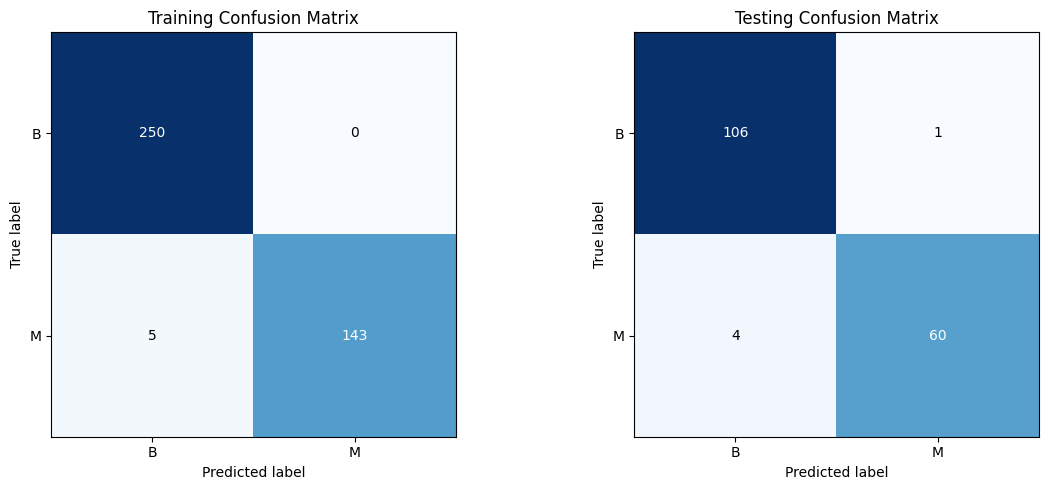

Training F1-score: 0.983, Precision: 1.000, Recall: 0.966, False Alarm Rate: 0.000, AUC: 0.997
Testing F1-score: 0.960, Precision: 0.984, Recall: 0.938, False Alarm Rate: 0.009, AUC: 0.998


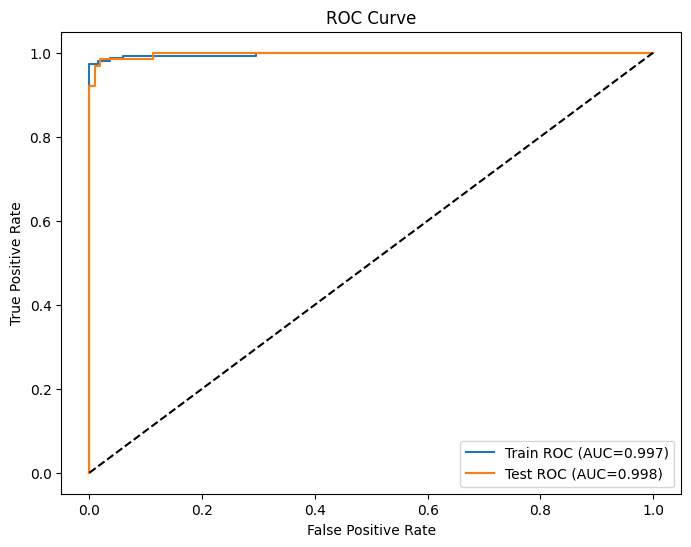

In [32]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

import matplotlib.pyplot as plt

# Get predicted labels and probabilities for train and test sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

# Convert y_train and y_test to 1D arrays of labels
y_train_true = y_train.values.ravel()
y_test_true = y_test.values.ravel()

# Confusion matrices
cm_train = confusion_matrix(y_train_true, y_train_pred)
cm_test = confusion_matrix(y_test_true, y_test_pred)

# Metrics
f1_train = f1_score(y_train_true, y_train_pred, pos_label='M')
f1_test = f1_score(y_test_true, y_test_pred, pos_label='M')
precision_train = precision_score(y_train_true, y_train_pred, pos_label='M')
precision_test = precision_score(y_test_true, y_test_pred, pos_label='M')
recall_train = recall_score(y_train_true, y_train_pred, pos_label='M')
recall_test = recall_score(y_test_true, y_test_pred, pos_label='M')

# False alarm rate = FP / (FP + TN)
def false_alarm_rate(cm):
    FP = cm[0,1]
    TN = cm[0,0]
    return FP / (FP + TN)

far_train = false_alarm_rate(cm_train)
far_test = false_alarm_rate(cm_test)

# ROC curve and AUC
fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_prob, pos_label='M')
fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_prob, pos_label='M')
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, cm, title in zip(axes, [cm_train, cm_test], ["Training Confusion Matrix", "Testing Confusion Matrix"]):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    tick_marks = np.arange(len(np.unique(y_train_true)))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(np.unique(y_train_true))
    ax.set_yticklabels(np.unique(y_train_true))
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")
  

plt.tight_layout()
plt.show()
print(f"Training F1-score: {f1_train:.3f}, Precision: {precision_train:.3f}, Recall: {recall_train:.3f}, False Alarm Rate: {far_train:.3f}, AUC: {auc_train:.3f}")
print(f"Testing F1-score: {f1_test:.3f}, Precision: {precision_test:.3f}, Recall: {recall_test:.3f}, False Alarm Rate: {far_test:.3f}, AUC: {auc_test:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC={auc_train:.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC={auc_test:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Insights from the Logistic Regression Results

- **Model Performance:**  
    The logistic regression model achieved very high accuracy, with a training accuracy of 0.987 and a testing accuracy of 0.971. The F1-score was also high for both training (0.983) and testing (0.96) sets, indicating strong and balanced performance in classifying malignant and benign tumors.

- **False Alarm Rate:**  
    The false alarm rate (proportion of benign cases incorrectly classified as malignant) was extremely low: 0.0 on the training set and only 0.009 on the test set. This means the model is highly reliable in minimizing unnecessary alarms.

- **Precision and Recall:**  
    Precision and recall for the malignant class were both high on the test set (precision: 0.984, recall: 0.938), showing the model is effective at both identifying true positives and minimizing false positives.

- **Feature Importance:**  
    The most important features (by absolute value of coefficients) included <mark>texture3</mark>, <mark>radius2</mark>, <mark>symmetry3</mark>, <mark>area2</mark>, and <mark>compactness2</mark>. This suggests that these measurements are most influential in distinguishing between malignant and benign tumors.

- **Generalization:**  
    The close match between training and testing metrics (accuracy, F1, precision, recall, and false alarm rate) indicates that the model generalizes well and is not overfitting.

- **Overall Conclusion:**  
    Logistic regression, combined with feature scaling, provides a robust and interpretable model for breast cancer diagnosis on this dataset. The model's high accuracy and low false alarm rate make it suitable for practical diagnostic support.

<mark  style="background-color: #80d1fcff; color: black;">Training F1-score: 0.983, Precision: 1.000, Recall: 0.966, False Alarm Rate: 0.000, AUC: 0.997</mark> 

<mark  style="background-color: #80d1fcff; color: black;">Testing F1-score: 0.960, Precision: 0.984, Recall: 0.938, False Alarm Rate: 0.009, AUC: 0.998</mark>


### Additional Takeaways from the Machine Exercise

Problem 1 involves predicting a continuous target variable (heating load), making it a regression problem. In contrast, Problem 2 deals with categorical labels (tumor status), so it is a classification problem. 

Through this exercise, I learned that evaluating regression models is different from classification models. For regression, metrics like R² (coefficient of determination) are used instead of accuracy, since the concept of "correct predictions" does not apply to continuous outputs. This clarified my earlier misconception that accuracy (as the proportion of correct predictions) could be used for regression tasks.